In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


get_ipython().magic('matplotlib inline')

df = pd.read_csv('romatemp.csv')

df.head()


,STATION,NAME,DATE,TMAX,TMIN
0,IT000162240,"VIGNA DI VALLE, IT",2005-01-01,49.0,37.0
1,IT000162240,"VIGNA DI VALLE, IT",2005-01-02,49.0,37.0
2,IT000162240,"VIGNA DI VALLE, IT",2005-01-03,51.0,39.0
3,IT000162240,"VIGNA DI VALLE, IT",2005-01-04,52.0,38.0
4,IT000162240,"VIGNA DI VALLE, IT",2005-01-05,55.0,41.0


In [41]:
#converting from wide format to long format

df1 = pd.melt(df, value_vars =['TMIN', 'TMAX'], id_vars=['DATE','STATION'], value_name='value', var_name='mesurement')
df1.head()

,DATE,STATION,mesurement,value
0,2005-01-01,IT000162240,TMIN,37.0
1,2005-01-02,IT000162240,TMIN,37.0
2,2005-01-03,IT000162240,TMIN,39.0
3,2005-01-04,IT000162240,TMIN,38.0
4,2005-01-05,IT000162240,TMIN,41.0


In [42]:
df1 = df1.sort_values(by=['STATION','DATE'])

# Converting Date to string to divide into months and years
df1['DATE'] = df1['DATE'].astype(str)
#Removing leap year day
df1 = df1[~df1.DATE.str.contains('02-29')]
df1['Year'], df1['Month'] = zip(*df1['DATE'].apply(lambda x: (x[:4], x[5:])))

df1.reset_index(drop=True, inplace=True)
df1.head()

,DATE,STATION,mesurement,value,Year,Month
0,2005-01-01,IT000016239,TMIN,32.0,2005,01-01
1,2005-01-01,IT000016239,TMAX,50.0,2005,01-01
2,2005-01-02,IT000016239,TMIN,32.0,2005,01-02
3,2005-01-02,IT000016239,TMAX,51.0,2005,01-02
4,2005-01-03,IT000016239,TMIN,35.0,2005,01-03


In [43]:


low = df1[(df1['mesurement'] == 'TMIN') & (df1['Year'] < '2015')].groupby(['Month']).aggregate({'value':np.min})
high = df1[(df1['mesurement'] == 'TMAX') & (df1['Year'] < '2015')].groupby(['Month']).aggregate({'value':np.max})

In [44]:
low_2015 = df1[(df1['mesurement'] == 'TMIN') & (df1['Year'] == '2015')].groupby(['Month']).aggregate({'value':np.min})
high_2015 = df1[(df1['mesurement'] == 'TMAX') & (df1['Year'] == '2015')].groupby(['Month']).aggregate({'value':np.max})

In [45]:
new_low = np.where(low_2015['value'] < low['value'])
new_high = np.where(high_2015['value'] > high['value'])

In [46]:
lows = low.reset_index()
lows = lows.drop(['Month'], axis=1)
lows = np.array(lows)
low_new = lows.flatten()

highs = high.reset_index()
highs = highs.drop(['Month'], axis=1)
highs = np.array(highs)
high_new = highs.flatten()

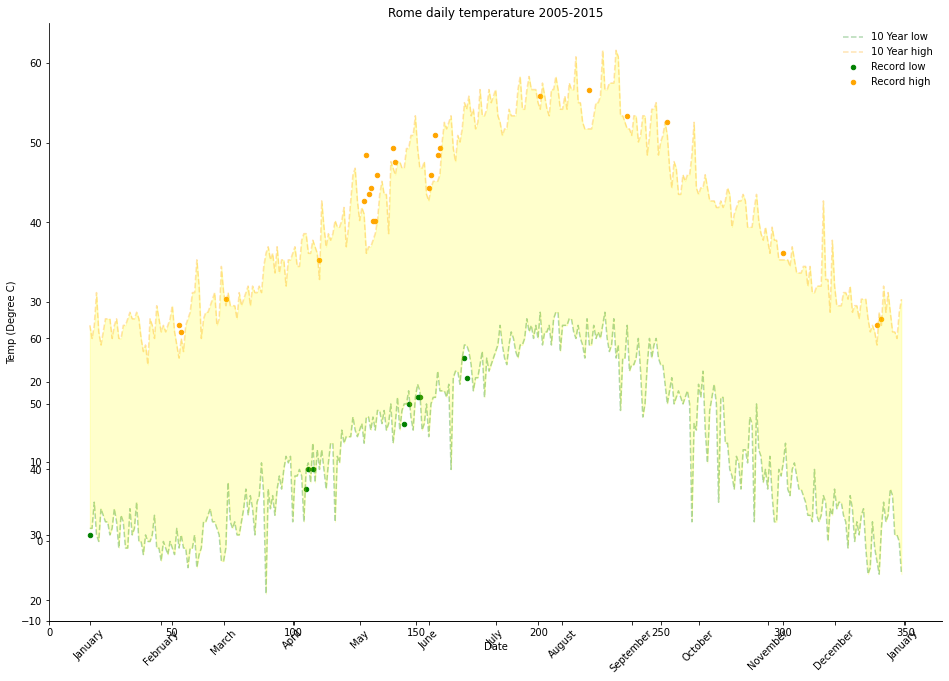

In [61]:
plt.figure(figsize=(16,11))


plt.xlabel('Date')
plt.ylabel('Temp (Degree C)')
plt.title('Rome daily temperature 2005-2015')
plt.gca().axis([0,365, -10, 65])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

axes = plt.axes()
axes.set_xticks([0,32,60,91,121, 152, 182, 212,243,273, 304, 334, 365])
axes.set_xticklabels(['January','February', 'March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January'])
plt.xticks(rotation=45)
axes.set_yticks([-10,0,10,20,30,40,50,60])


plt.scatter(new_low, low_2015.iloc[new_low], s=20, c='green')
plt.scatter(new_high, high_2015.iloc[new_high], s=20, c='orange')

plt.plot(low_new, '--', color = 'green', alpha = 0.3)
plt.plot(high_new, '--', color = 'orange', alpha = 0.3)
plt.gca().fill_between(range(len(low_new)), low_new, high_new, 
                       color='yellow', 
                       alpha=0.20, label = '_nolegend_')

plt.legend(['10 Year low', '10 Year high', 'Record low', 'Record high'], frameon=False, loc = 0)
